# Quickstart for non-Newtonian pipe flow calculations

All units are SI.

### Nomenclature

This notebook provides deep examples for using rheopy for pipe flow.  Both tube and slit flow examples with a variety of viscosity models are provided.  SI units units are used everywhere.  For the variables used here, the units are:

$\eta = \left< Pas \right>$

$\sigma = \left< Pa \right>$

$\dot{\gamma} = \left< s^{-1} \right>$

$\Delta P = \left< Pa \right>$

$Q = \left< \frac{m^3}{s} \right>$

$v_z = \left< \frac{m}{s} \right>$

$length = \left< m \right>$

$radius = \left< m \right>$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Math, Latex
import rheoflow

## Step 1 - Specify a viscosity model

The variable (object) name is up to the user.  Here we use my_carreau_model as the name for a Carreau viscosity model with associated parameters.

The details of rheoflow.viscosity.carreau may be viewed by typing help(rheoflow.viscosity.carreau).  A list of all viscosity models currently implemented may be accessed by typing help(rheoflow.viscosity).

The python code is all viewable in viscosity.py

In [2]:
my_carreau_model = rheoflow.viscosity.carreau('My first Carreau model',
                    eta0=5.,etainf=.11,reltime=.02,a=1.3,n=.3)

## Step 2 - Specify a pipe using the viscosity model

The variable (object) name is up to the user. Here we use my_carreau_tube as the name for a laminar pipe flow object with associated parameters.  The viscosity model defined (instantiated) above is used.

The pipe has the following attributes:

radius = 0.01 m,
length = 1.0 m,
fluid density = 1000 kg/m^3

In [3]:
my_carreau_tube = rheoflow.pipe.laminar('my laminar flow pipe',density=1000.,
                               radius=.01,length=1.0,viscosity=my_carreau_model)

## Step 3 - use the pipe flow object

Initially, neither pressure drop or flow rate were specified. 

In [4]:
print(my_carreau_tube)

Name =my laminar flow pipe
Radius =0.01
Length =1.0
Pressure drop =None
Flow rate =None
Shear rate wall = None


Specifiy a pressure drop

In [5]:
my_carreau_tube.pressure_drop = 20000.

In [6]:
print(my_carreau_tube)

Name =my laminar flow pipe
Radius =0.01
Length =1.0
Pressure drop =20000.0
Flow rate =1.782691971171862e-05
Shear rate wall = 23.673966897448867


### Accessing attributes of a pipe object

In [7]:
my_carreau_tube.q

1.782691971171862e-05

In [8]:
my_carreau_tube.pressure_drop

20000.0

In [9]:
my_carreau_tube.radius

0.01

In [11]:
my_carreau_tube.shear_rate_wall

23.673966897448867

In [12]:
my_carreau_tube.shear_stress_wall

100.0

### Modifying attributes of a pipe object

In [13]:
my_carreau_tube.q = .0001

In [14]:
print(my_carreau_tube)

Name =my laminar flow pipe
Radius =0.01
Length =1.0
Pressure drop =65281.39307599825
Flow rate =0.0001
Shear rate wall = 157.32118720688686


In [15]:
my_carreau_tube.pressure_drop = 40000.

In [16]:
print(my_carreau_tube)

Name =my laminar flow pipe
Radius =0.01
Length =1.0
Pressure drop =40000.0
Flow rate =4.376689029902029e-05
Shear rate wall = 62.29932871052237


### A few convenience plots

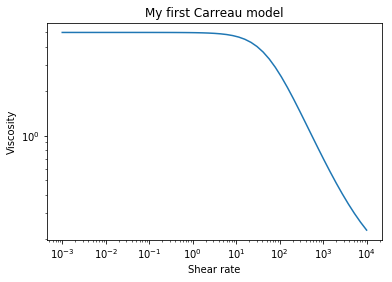

In [18]:
my_carreau_model.visc_plot()

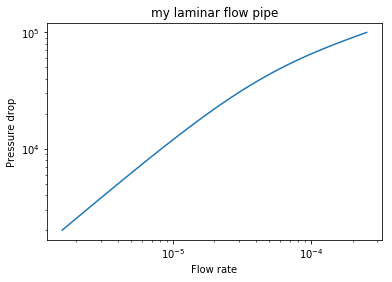

In [20]:
my_carreau_tube.q_plot(pressure_drop_min=2000.,pressure_drop_max=100000.)

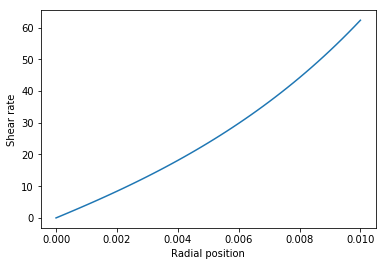

In [21]:
my_carreau_tube.shear_rate_plot()

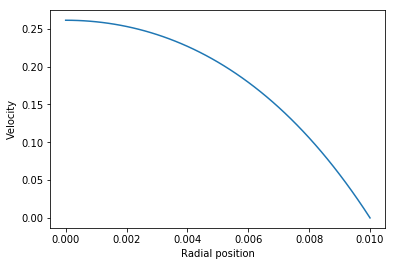

In [22]:
my_carreau_tube.vz_plot()